In [115]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [116]:
def generate_samples_and_labels(
    num_samples: int,
    mean: np.ndarray,
    covariance: np.ndarray,
    theta: np.ndarray,
    label_variance: float,
    seed=42,
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate samples and corresponding labels from a multivariate Gaussian distribution.

    Args:
        num_samples (int): Number of samples to generate.
        mean (np.ndarray): Mean vector of the multivariate Gaussian distribution.
        covariance (np.ndarray): Covariance matrix of the multivariate Gaussian distribution.
        theta (np.ndarray): Coefficient vector for generating labels.
        label_variance (float): Variance of the Gaussian noise added to the labels.
        seed (int): Seed for the random number generator.

    Returns:
        Tuple[np.ndarray, np.ndarray]: A tuple containing the generated samples and labels.
    """
    if seed is not None:
        np.random.seed(seed)

    samples = np.random.multivariate_normal(mean, covariance, num_samples)

    labels = samples @ theta + np.random.normal(0, label_variance, num_samples)

    return samples, labels

In [117]:
# Mean vector and covariance matrix for initial sampling
mean = np.array([0, 0])
covariance = np.array([[1, 0], [0, 1]])
num_samples = 20

# Theta vector
theta = np.array([-1, 1])

# Variance for the label distribution
label_variance = 0.1

samples, labels = generate_samples_and_labels(
    num_samples, mean, covariance, theta, label_variance, seed=42
)


In [118]:
# Plotting samples
def plot_samples(samples: np.ndarray, labels: np.ndarray) -> None:
    """
    Plot the samples and labels.

    Args:
        samples (np.ndarray): Array of samples.
        labels (np.ndarray): Array of labels.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(
        samples[:, 0],
        samples[:, 1],
        c=labels,
        cmap="viridis",
        s=100,
        alpha=0.7,
        edgecolor="k",
    )
    plt.colorbar(label="Label value")
    plt.title("2D Gaussian Samples")
    plt.xlabel("X1")
    plt.ylabel("X2")

    plt.grid(True)
    plt.show()

## Posterior distribution

We can compute the posterior distribution using equation (55) and (56) in "PML Lecture Notes for Lectures by Oswin".

In [119]:
def posterior_distribution(covariance, samples, label_variance):
    """
    Compute the posterior distribution of the weights given the samples.

    Args:
        covariance (np.ndarray): Covariance matrix of the multivariate Gaussian distribution.
        samples (np.ndarray): Samples for which to compute the posterior distribution.
        label_variance (float): Variance of the Gaussian noise added to the labels.

    Returns:
        Tuple[np.ndarray, np.ndarray]: A tuple containing the mean and covariance of the posterior distribution.
    """

    mean_tmp = (
        covariance
        @ samples.T
        @ (
            np.linalg.inv(
                label_variance * np.identity(num_samples)
                + samples @ covariance @ samples.T
            )
        )
    )
    posterior_mean = mean_tmp @ labels

    posterior_covariance = covariance - mean_tmp @ samples @ covariance

    return posterior_mean, posterior_covariance


In [120]:
# Posterior multivariate normal distribution
posterior_mean, posterior_covariance = posterior_distribution(
    covariance, samples, label_variance
)
posterior = multivariate_normal(posterior_mean, posterior_covariance)


In [121]:
# Grid ranges
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = posterior.pdf(pos)


In [122]:
# Contour plot
def plot_contour(X, Y, Z):
    cmap = "viridis"
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap=cmap)
    plt.xlabel("X1-axis")
    plt.ylabel("X2-axis")
    plt.title("Contour plot of 2D Multivariate Gaussian Distribution")
    plt.colorbar(label="Probability Density")
    plt.show()

## Posterior predictive distribution

The posterior predictive distribution is given by equation (57) in "PML Lecture Notes for Lectures by Oswin".

In [123]:
def posterior_predictive(x, cov):
    pp_mean = x @ mean
    pp_cov = x @ cov @ x.T + label_variance
    return pp_mean, pp_cov

## Plot variance for posterior predictive distribution

In [124]:
def evaluate_quadratic_form(pos, cov, label_variance):
    """
    Evaluate the quadratic form x.T @ cov @ x for each point x in pos.

    Parameters:
    pos (ndarray): An array of shape (..., 2) containing points where the function is evaluated.
    cov (ndarray): A 2x2 covariance matrix.
    label_variance (float): The variance of the label distribution.

    Returns:
    ndarray: An array of values of the quadratic form at each point in pos.
    """
    # Compute the matrix multiplication of pos and cov
    # pos @ cov has the same shape as pos
    cov_times_pos = np.matmul(pos, cov)

    # Element-wise multiplication of pos and cov_times_pos
    # Sum over the last axis to get the scalar value for each point
    values = np.sum(pos * cov_times_pos, axis=-1)

    return values + label_variance

In [125]:
def pos_pred_var(X_new, cov, noise):
    return np.array([X.T @ cov @ X + noise for X in X_new])

In [126]:
ZZ = evaluate_quadratic_form(pos, posterior_covariance, label_variance)
# ZZ = pos_pred_var(pos, posterior_covariance, label_variance)

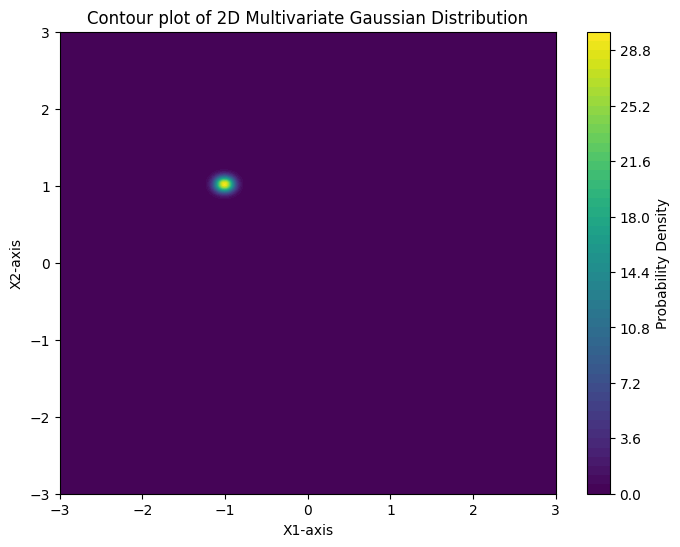

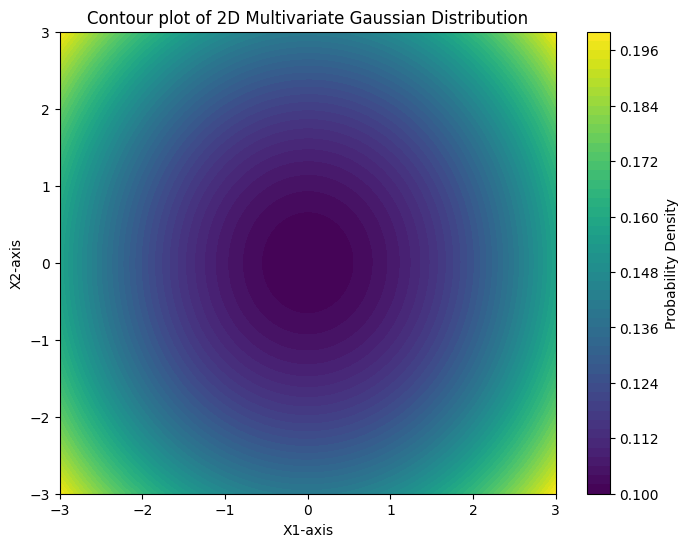

In [127]:
# plot_samples(samples, labels)
plot_contour(X, Y, Z)
plot_contour(X, Y, ZZ)

In [128]:
covariance = np.array([[0.1, 0], [0, 1]])
samples2, labels2 = generate_samples_and_labels(
    num_samples=20,
    mean=mean,
    covariance=covariance,
    theta=theta,
    label_variance=label_variance,
    seed=42,
)

In [ ]:
posterior_mean, posterior_covariance = posterior_distribution(
    covariance, samples2, label_variance
)
posterior = multivariate_normal(posterior_mean, posterior_covariance)
Z = posterior.pdf(pos)

ZZ = evaluate_quadratic_form(pos, posterior_covariance, label_variance)

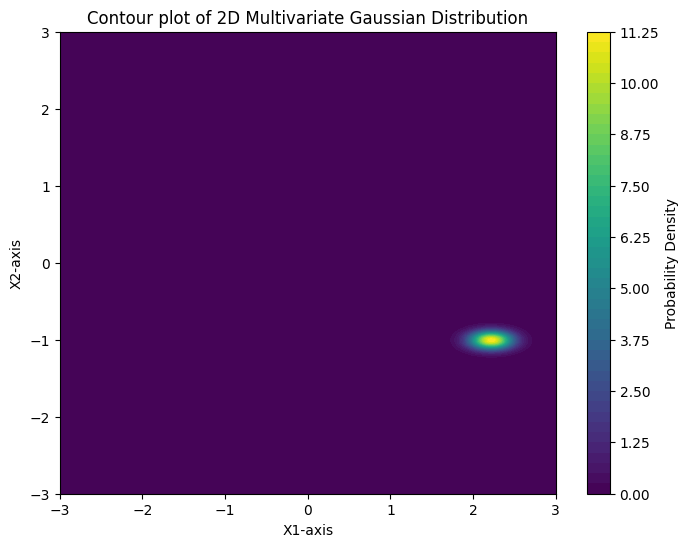

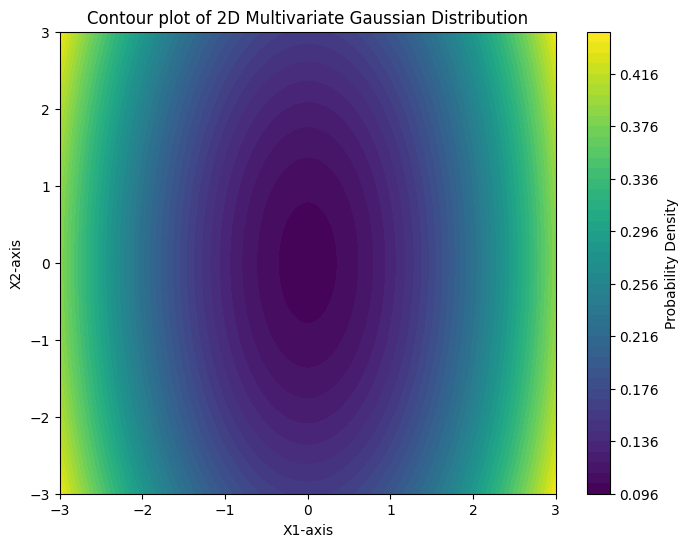

In [130]:
plot_contour(X, Y, Z)
plot_contour(X, Y, ZZ)